<a href="https://colab.research.google.com/github/ucfilho/optim_raianars/blob/master/ANN_DE_set_11_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/ucfilho/optim_raianars/ #clonar do Github
%cd optim_raianars
#!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

Cloning into 'optim_raianars'...
remote: Enumerating objects: 421, done.
remote: Total 421 (delta 0), reused 0 (delta 0), pack-reused 421
Receiving objects: 100% (421/421), 415.99 KiB | 774.00 KiB/s, done.
Resolving deltas: 100% (232/232), done.
/content/optim_raianars
Hello world
I'm evolving!!!



In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def normatize(x,w):
    strings=list(x)
    for featur in strings:
        max_feat=w[featur].max()
        min_feat=w[featur].min()
        x[featur]=(x[featur]-min_feat)/(max_feat-min_feat)
    return x


# normatize funcion
def original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=x[featur]*(max_feat-min_feat)+min_feat
    return x

In [0]:
X_NOME=['DI RELATIVO','FRAC Its','VELOC FOBJ',
        'VELOC X','DELTA FOBJ','DELTA VX']
Y_NOME=['NP','F','CR']
ARQ_X='X_DAT_set_11_2019.csv'
X=pd.read_csv(ARQ_X)
X=X[X_NOME]
ARQ_Y='Y_DAT_set_11_2019.csv'
Y=pd.read_csv(ARQ_Y)
Y=Y[Y_NOME]
X_train= X.sample(frac =.7,random_state = 2)  
Y_train= Y.sample(frac =.7,random_state = 2)
X_test = X.loc[~X.index.isin(X_train.index), :]
Y_test = Y.loc[~Y.index.isin(Y_train.index), :]  
y_old=Y_train.loc[Y_train['NP']==Y_train['NP'],['CR']].values
y_total=Y['CR']
y_total=pd.DataFrame(y_total)
y_total.columns = ["y_old"]
Y_train=normatize(Y_train,Y)
X_train=normatize(X_train,X)


In [0]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# tansig function
def tansig(x,deriv=False):
    if(deriv==True):
        return (1-x*x)
    return 2/(1+np.exp(-2*x))-1

# purelin function
def purelin(x,deriv=False):
    if(deriv==True):
        return 1
    return x

# normatize funcion
def normatize(x,w):
    # intervalo -1 a 1
    a=-1
    b=1
    strings=list(x)
    for featur in strings:
        max_feat=w[featur].max()
        min_feat=w[featur].min()
        x[featur]=a+(x[featur]-min_feat)*(b-a)/(max_feat-min_feat)
    return x


# normatize funcion
def original(x,x_old):
    strings=list(x)
    x_old.columns = list(x)
    a=-1
    b=1
    for featur in strings:
        max_feat=x_old[featur].max()
        min_feat=x_old[featur].min()
        x[featur]=(x[featur]-a)*(max_feat-min_feat)/(b-a)+min_feat
    return x

In [0]:
# neural network treina
def neural_treina(X_train,Y_train,W):
  Neuron_input=6
  Neuron_hidden=5
  Neuron_output=1
  X_train=X_train.loc[X_train['VELOC X']==X_train['VELOC X'],X_NOME].values
  y=Y_train.loc[Y_train['NP']==Y_train['NP'],['CR']].values 
  Num=len(W)
  syn0=np.zeros((Neuron_input,Neuron_hidden))
  N0=Neuron_input*Neuron_hidden
  N1=Neuron_hidden*Neuron_output
  #syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
  #syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1  
  syn1=np.zeros((Neuron_hidden,Neuron_output))
  k=-1
  for i in range(Neuron_input):
    for j in range(Neuron_hidden):
      k=k+1
      #print(k)
      syn0[i,j]=W[k]
  #print(syn0)
  #print(W)
  
 
  for i in range(Neuron_hidden):
    for j in range(Neuron_output):
      k=k+1
      #print(k)
      syn1[i,j]=W[k]
  #print(syn1)
  l0 = X_train
  #print(l0)
  #print("==========================")
  numOfRows = np.size(l0, 0)
  numOfColumns = np.size(l0, 1)

  #print("rows l0",numOfRows)
  #print("cols l0",numOfColumns)
  numOfRows = np.size(syn0, 0)
  numOfColumns = np.size(syn0, 1)
  #print("rows syn0",numOfRows)
  #print("cols syn0",numOfColumns)

    #l1 = sigmoid(np.dot(l0,syn0))
  l1 = tansig(np.dot(l0,syn0))
  #print(l1)
  l2 = purelin(np.dot(l1,syn1))
  l2_error = y - l2
  fobs=np.mean(np.abs(l2_error))
  return fobs

In [0]:
# neural network treina
def neural_uso(X_train,W):
  
  X_train=X_train.loc[X_train['VELOC X']==X_train['VELOC X'],X_NOME].values
  Neuron_input=6
  Neuron_hidden=5
  Neuron_output=1
  #y=Y_train.loc[Y_train['NP']==Y_train['NP'],['CR']].values 
  Num=len(W)
  syn0=np.zeros((Neuron_input,Neuron_hidden))
  #syn0 = 2*np.random.random((Neuron_input,Neuron_hidden)) - 1
  #syn1 = 2*np.random.random((Neuron_hidden,Neuron_output)) - 1  
  syn1=np.zeros((Neuron_hidden,Neuron_output))
  k=-1
  for i in range(Neuron_input):
    for j in range(Neuron_hidden):
      k=k+1
      #print(k)
      syn0[i,j]=W[k]
  #print(syn0)
  #print(syn0)
  for i in range(Neuron_hidden):
    for j in range(Neuron_output):
      k=k+1
      syn1[i,j]=W[k]
  #print(syn1)
  l0 = X_train
    #l1 = sigmoid(np.dot(l0,syn0))
  l1 = tansig(np.dot(l0,syn0))
  l2 = purelin(np.dot(l1,syn1))
  y_calc=np.reshape(l2,len(l2))
  
  return y_calc

In [0]:
'''funcao do DE'''
def function(x):
  global X_train,Y_train
  fobs=neural_treina(X_train,Y_train,x)
  return fobs

In [0]:
Neuron_input=6
Neuron_hidden=5
Neuron_output=1
N0=Neuron_input*Neuron_hidden
N1=Neuron_hidden*Neuron_output
Num=N0+N1
bounds = [(-5, 5)]*Num
ret = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=5, popsize=50,recombination=0.5)

In [10]:
print(Num)
print(X_train)

35
     DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X  DELTA FOBJ  DELTA VX
41  1.237973e-05  0.592668         1.0      0.5        0.75      0.75
17  3.269206e-08  0.997149         1.0      0.5        0.50      0.50
43  9.505520e-08  0.910387         1.0      0.5        0.50      0.50
14  2.132172e-06  0.560896         1.0      0.5        0.50      0.50
44  6.071331e-09  0.971487         1.0      0.5        0.50      0.50
29  1.924677e-05  0.189409         1.0      0.5        0.50      0.50
12  5.265397e-05  0.321385         1.0      0.0        0.50      0.00
13  1.682781e-05  0.483910         1.0      0.5        0.50      0.75
0   1.314343e-01  0.002037         0.0      0.0        0.50      0.50
2   6.732239e-02  0.237271         0.0      1.0        0.00      0.50
9   1.000000e+00  0.047658         0.0      0.0        0.50      0.50
16  1.836830e-07  0.885947         1.0      0.5        0.50      0.50
37  1.793683e-01  0.134420         1.0      1.0        1.00      1.00
24  2.802180e-05 

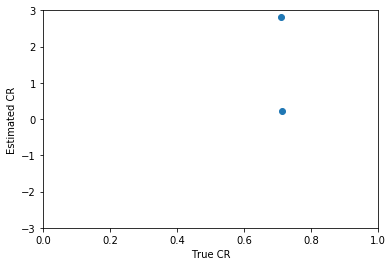

In [23]:
x=ret.x
y_calc_testa=neural_uso(X_test,x)
y_old=pd.DataFrame(y_old)
y_old.columns = ["y_old"]
#print(y_calc_testa)
#print(y_total)
y_calc_testa=pd.DataFrame({'y_calc':y_calc_testa})
y_calc_testa=original(y_calc_testa,y_total)

y_obs=Y_test.loc[Y_test['NP']==Y_test['NP'],['CR']].values
plt.scatter(y_obs,y_calc_testa)
plt.xlabel("True CR")
plt.ylabel("Estimated CR")
plt.xlim((0,1))
plt.ylim((-3,3))
plt.show()

In [27]:
y_calc_testa=neural_uso(X_test,x)
y_calc_testa=pd.DataFrame({'y_calc':y_calc_testa})
y_calc_testa=original(y_calc_testa,y_total)
print(y_total)

      y_calc
0   1.012922
1   0.802863
2   1.669235
3   0.764967
4   2.118017
5   0.416289
6   1.034142
7   5.523734
8   0.714686
9   1.670010
10  0.316391
11  1.089800
12  3.112017
13  0.432577
14  2.282555
15  0.815767
16  0.661173
17  4.233313
18  1.012922
19  0.802863
20  1.669235
21  0.764967
22  2.118017
23  0.416289
24  1.034142
25  5.523734
26  0.714686
27  2.597122
28  0.262901
29  1.377470
30  3.708576
31  0.711451
32  2.127458
33  0.327149
34  1.381008
35  0.772347
36  2.597122
37  0.262901
38  1.377470
39  3.708576
40  0.711451
41  2.127458
42  0.327149
43  1.381008
44  0.772347
